In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1. 提出问题
分析影响共享单车需求的因素，制作可视化报告

### 2. 提取数据


In [2]:
train = pd.read_csv('D:/ChromeDownload/DATA anlysis/bike sharing/train.csv')
test = pd.read_csv('D:/ChromeDownload/DATA anlysis/bike sharing/test.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


训练数据集、测试数据集均无缺失数据，训练数据集比测试数据集多3列（casual、registered、count）

### 3. 理解数据

* datetime - 日期+时间
* season - 季节（1=spring ，2 = summer ， 3 = fall ， 4 = winter）
* holiday - 是否假日
* workingday - 是否工作日
* weather - 天气（1 = 晴、多云，2 = 雾、阴天 、3 = 小雪、小雨 ， 4 = 大雨、大雪、大雾）
* temp - 气温摄氏度
* atemp - 体感温度
* humidity - 湿度
* windspeed - 风速
* casual - 非注册会员统计数
* registered - 注册会员统计数
* count - 总统计数   count = casual + registered



### 4. 数据清洗与可视化分析
#### 4.1时间序列数据处理
时间序列数据中 月份、天、一天中不同的时间对共享单车的需求都会有影响，需要把datetime拆分以对count进行分析

In [7]:
from datetime import datetime

In [8]:
bikedf = train

In [9]:
#添加month列
dateSer = bikedf['datetime'].map(lambda m: m.split(' ')[0])
dateSer_dt = dateSer.map(lambda s:datetime.strptime(s,'%Y-%m-%d'))
bikedf['month'] = dateSer_dt.map(lambda x: x.month)
bikedf.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1


In [10]:
#添加星期weekday列
bikedf['weekday'] = dateSer_dt.map(lambda a :a.weekday())
bikedf.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5


In [11]:
#添加日期date列
bikedf['date']= dateSer_dt
bikedf.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,2011-01-01


In [12]:
#添加小时hour列
def get_hour(x):
    hour = x.split(' ')[1].split(':')[0]
    int_hour = int(hour)#将字符串转换成数值类型，方便后面制表时hour按数值大小自动排序
    return int_hour
bikedf['hour'] = bikedf['datetime'].apply(get_hour)
bikedf.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday,date,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,2011-01-01,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011-01-01,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2011-01-01,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,2011-01-01,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,2011-01-01,4


In [13]:
#删除datetime列
bikedf.drop('datetime',axis = 1, inplace = True)
bikedf.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday,date,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,2011-01-01,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011-01-01,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2011-01-01,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,2011-01-01,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,2011-01-01,4


#### 4.2 计算相关系数
* 说明：在以上的变量中，只计算temp、atemp、windspeed、humidity与count的相关系数。因为其余变量均为分类数据类型，计算其与count的相关系数并无实际意义，而 count = casual + registered ，所以计算casual和registered与count的相关系数亦无意义。

In [14]:
bikedf1 = pd.concat([bikedf['temp'],bikedf['atemp'],bikedf['humidity'],bikedf['windspeed'],bikedf['count']],axis =1)
bikedf1.head()

,temp,atemp,humidity,windspeed,count
0,9.84,14.395,81,0.0,16
1,9.02,13.635,80,0.0,40
2,9.02,13.635,80,0.0,32
3,9.84,14.395,75,0.0,13
4,9.84,14.395,75,0.0,1


In [15]:
correlation = bikedf1.corr()
correlation

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


#### 4.3相关系数可视化分析

In [16]:
import seaborn as sns
sns.choose_colorbrewer_palette("sequential",as_cmap=True)

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text yticklabel objects>)

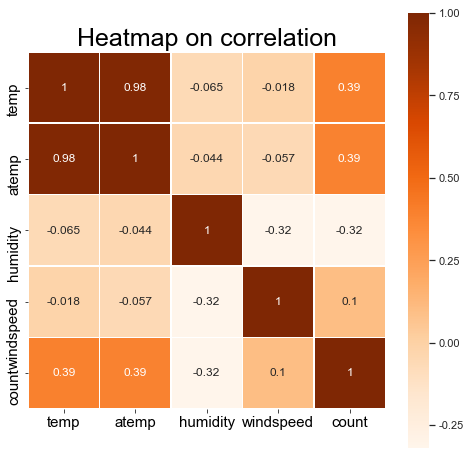

In [17]:
fig=plt.figure(figsize=(8,8))
ax1=fig.add_subplot(1,1,1)
sns.set(style='dark')
sns.heatmap(correlation,ax=ax1,square=True,annot=True,cmap = 'Oranges', linewidths=.5)
plt.title('Heatmap on correlation',fontsize = 25,color = 'black')
plt.xticks(fontsize = 15,color = 'black')
plt.yticks(fontsize = 15,color = 'black')

结论：
* 温度与租车需求有正相关关系，说明在一定温度范围内，温度越高租车需求越高
* 湿度与租车需求有负相关关系，说在在一定湿度范围内，湿度越高租车需求越低
* 温湿度、风速等天气因素与季节有关，还需进一步分析季节因素对租车需求的影响

#### 4.4 不同维度下的租车量分析

In [18]:
#建立季节映射字典
seasonDict = {1:'Spring',2:'Summer',3:'Fall',4:'Winter'}
bikedf['season'] = bikedf['season'].map(seasonDict)
bikedf.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday,date,hour
0,Spring,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,2011-01-01,0
1,Spring,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011-01-01,1
2,Spring,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2011-01-01,2
3,Spring,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,2011-01-01,3
4,Spring,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,2011-01-01,4


In [19]:
#建立天气映射变量
weatherDict = {1:'good weather',2:'cloudy',3:'little rainy or snowy', 4:'bad weather'}
bikedf['weather'] = bikedf['weather'].map(weatherDict)
bikedf.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday,date,hour
0,Spring,0,0,good weather,9.84,14.395,81,0.0,3,13,16,1,5,2011-01-01,0
1,Spring,0,0,good weather,9.02,13.635,80,0.0,8,32,40,1,5,2011-01-01,1
2,Spring,0,0,good weather,9.02,13.635,80,0.0,5,27,32,1,5,2011-01-01,2
3,Spring,0,0,good weather,9.84,14.395,75,0.0,3,10,13,1,5,2011-01-01,3
4,Spring,0,0,good weather,9.84,14.395,75,0.0,0,1,1,1,5,2011-01-01,4


#### 4.4.1数据聚合

In [20]:
#season-count聚合
grouped1 = bikedf['count'].groupby(bikedf['season'])
SeasonAgg = pd.DataFrame(grouped1.sum()).reset_index()
SeasonAgg

,season,count
0,Fall,640662
1,Spring,312498
2,Summer,588282
3,Winter,544034


In [21]:
#weekday-count聚合
WeekdayAgg = pd.DataFrame(bikedf['count'].groupby(bikedf['weekday'],sort = True).sum()).reset_index()
weekdayDict = {0:'Mon',1:'Tue',2:'Thu',3:'Fou',4:'Fri',5:'Sat',6:'Sun'}
WeekdayAgg['weekday']= WeekdayAgg['weekday'].map(weekdayDict)
WeekdayAgg

,weekday,count
0,Mon,295296
1,Tue,291985
2,Thu,292226
3,Fou,306401
4,Fri,302504
5,Sat,311518
6,Sun,285546


In [22]:
#weather-count聚合
weatherAgg = pd.DataFrame(bikedf['count'].groupby(bikedf['weather']).sum()).reset_index()
weatherAgg

,weather,count
0,bad weather,164
1,cloudy,507160
2,good weather,1476063
3,little rainy or snowy,102089


In [23]:
#hour-count聚合
hourAgg = pd.DataFrame(bikedf['count'].groupby(bikedf['hour'],sort = True).sum()).reset_index()
hourAgg

,hour,count
0,0,25088
1,1,15372
2,2,10259
3,3,5091
4,4,2832
5,5,8935
6,6,34698
7,7,96968
8,8,165060
9,9,100910


In [24]:
#holiday-count聚合
holidayAgg = pd.DataFrame(bikedf['count'].groupby(bikedf['holiday']).sum()).reset_index()
holidayAgg

,holiday,count
0,0,2027668
1,1,57808


In [25]:
#workingday-count聚合
workingdayAgg = pd.DataFrame(bikedf['count'].groupby(bikedf['workingday']).sum()).reset_index()
workingdayAgg

,workingday,count
0,0,654872
1,1,1430604


In [26]:
#month-count聚合
monthAgg = pd.DataFrame(bikedf['count'].groupby(bikedf['month'],sort = True).sum()).reset_index()
monthAgg

,month,count
0,1,79884
1,2,99113
2,3,133501
3,4,167402
4,5,200147
5,6,220733
6,7,214617
7,8,213516
8,9,212529
9,10,207434


In [27]:
#casua/registered分类汇总
Tcasual = bikedf['casual'].sum()
print('非会员使用人次为：',Tcasual)
Tregistered = bikedf['registered'].sum()
print('会员使用人次为：',Tregistered)

非会员使用人次为： 392135
会员使用人次为： 1693341


#### 4.4.2 基于使用总量的分析

In [28]:
%matplotlib inline

[Text(0,0.5,'count'),
 Text(0.5,0,'month'),
 Text(0.5,1,'Bar plot on count by month')]

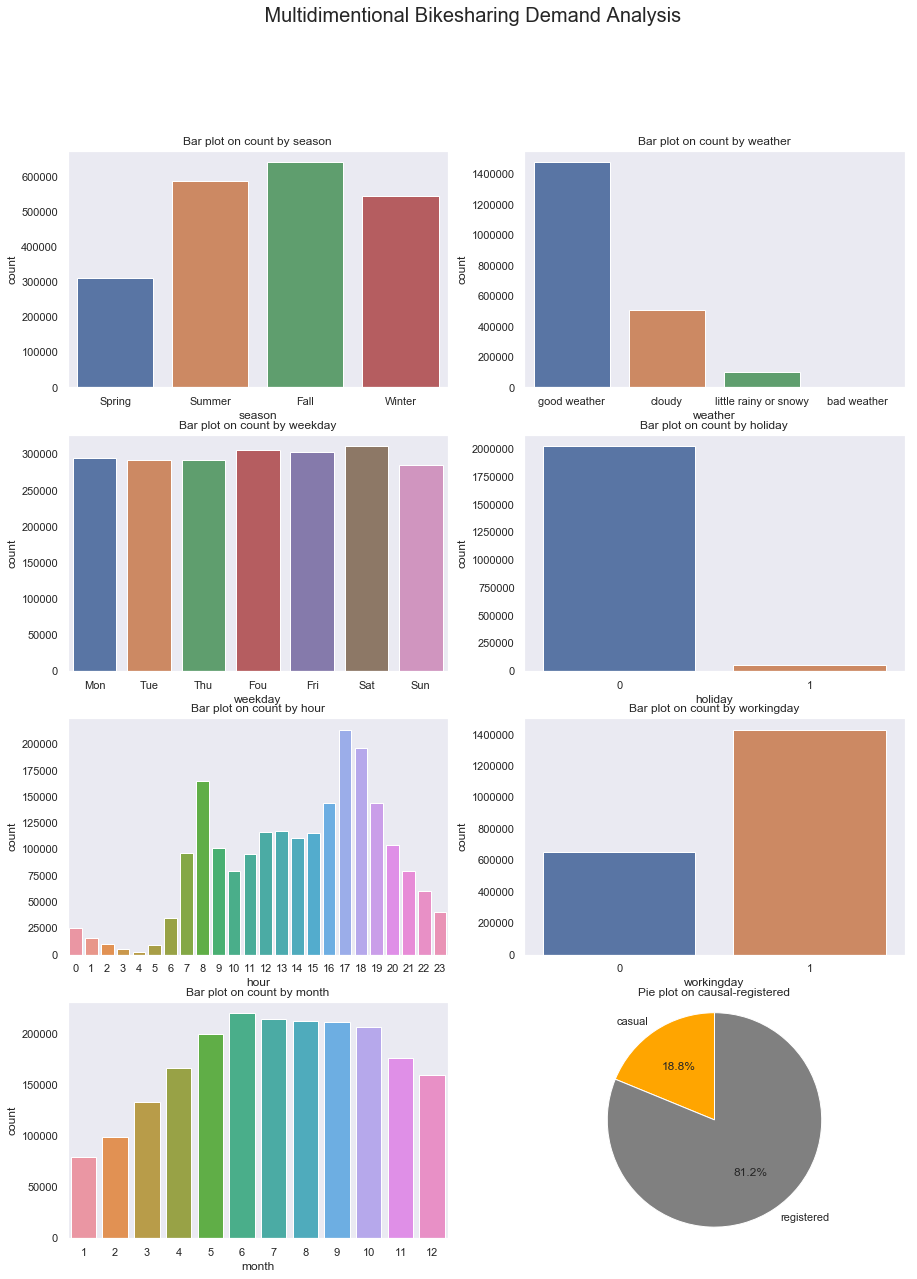

In [29]:
fig,axes = plt.subplots(4,2)
fig.suptitle(' Multidimentional Bikesharing Demand Analysis ',fontsize = 20)
sns.set(style = 'darkgrid')
fig.set_size_inches(15,20)

ax1 = sns.barplot(data = SeasonAgg, x = 'season',y = 'count',orient = 'v',ax = axes[0][0],
                  order = ['Spring','Summer','Fall','Winter'])#seansonAgg直方图
ax2 = sns.barplot(data = weatherAgg, x = 'weather',y = 'count',orient = 'v',ax = axes[0][1],
                  order = ['good weather','cloudy','little rainy or snowy','bad weather'])#weatherAgg条形图
ax3 = sns.barplot(data = WeekdayAgg, x = 'weekday',y = 'count',orient = 'v',ax = axes[1][0])#WeekdayAgg条形图
ax4 = sns.barplot(data = holidayAgg,x = 'holiday',y = 'count',orient = 'v',ax = axes[1][1])#holidayAgg条形图
ax5 = sns.barplot(data = hourAgg,x = 'hour',y = 'count',orient = 'v',ax = axes[2][0])#hourAgg条形图
ax6 = sns.barplot(data = workingdayAgg,x = 'workingday',y  = 'count',orient = 'v',ax = axes[2][1])#workingdayAgg条形图
ax7 = sns.barplot(data = monthAgg,x = 'month',y = 'count',orient = 'v',ax = axes[3][0])#monthAgg条形图
sizes = [392135,1693341]
labels = 'casual','registered'
colors = ['orange','grey']
ax8 = plt.pie(sizes, labels = labels,colors =colors,startangle = 90,autopct='%1.1f%%',)#casual-registered饼图
plt.axis('equal')
plt.title('Pie plot on causal-registered')

ax1.set(xlabel = 'season',ylabel = 'count',title = 'Bar plot on count by season')
ax2.set(xlabel = 'weather',ylabel = 'count',title = 'Bar plot on count by weather')
ax3.set(xlabel = 'weekday',ylabel = 'count',title = 'Bar plot on count by weekday')
ax4.set(xlabel = 'holiday',ylabel = 'count',title = 'Bar plot on count by holiday')
ax5.set(xlabel = 'hour',ylabel = 'count',title = 'Bar plot on count by hour')
ax6.set(xlabel = 'workingday',ylabel = 'count',title = 'Bar plot on count by workingday')
ax7.set(xlabel = 'month',ylabel = 'count',title = 'Bar plot on count by month')




#### 4.4.3 基于平均值的分析

In [45]:
#每周不同小时段的平均使用数
hourweekdayAvg = pd.DataFrame(bikedf['count'].groupby([bikedf['hour'],bikedf['weekday']],sort = True).mean()).reset_index()
weekdayDict = {0:'Mon',1:'Tue',2:'Thu',3:'Fou',4:'Fri',5:'Sat',6:'Sun'}
hourweekdayAvg['weekday'] = hourweekdayAvg['weekday'].map(weekdayDict)
hourweekdayAvg.head()

,hour,weekday,count
0,0,Mon,35.492308
1,0,Tue,27.328125
2,0,Thu,36.246154
3,0,Fou,37.476923
4,0,Fri,53.234375


[Text(0,0.5,'Users')]

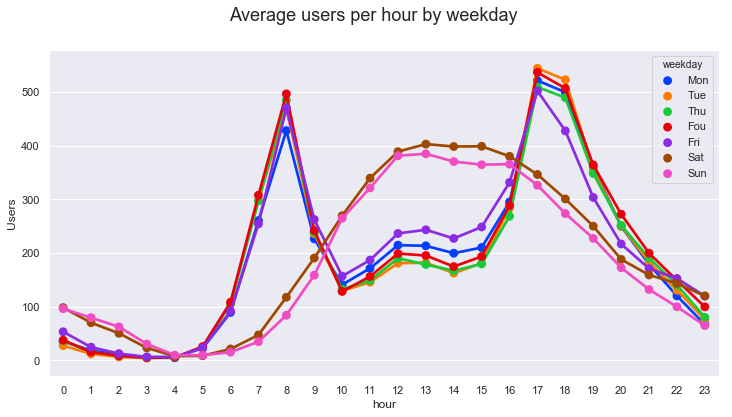

In [68]:
fig,ax1 = plt.subplots(1,1)
fig.suptitle('Average users per hour by weekday',fontsize = 18)
sns.set(style = 'darkgrid')
fig.set_size_inches(12,6)
ax1 = sns.pointplot(data = hourweekdayAvg,x = 'hour',y = 'count',hue = 'weekday',palette = 'bright')
ax1.set(ylabel = 'Users'  )

In [71]:
#在不同月中，每小时的使用人次
monthAvgPerhour = pd.DataFrame(bikedf['count'].groupby(bikedf['month'],sort =True).mean()).reset_index()
monthDict = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
monthAvgPerhour['month'] = monthAvgPerhour['month'].map(monthDict)
monthAvgPerhour

,month,count
0,January,90.366516
1,February,110.003330
2,March,148.169811
3,April,184.160616
4,May,219.459430
5,June,242.031798
6,July,235.325658
7,August,234.118421
8,September,233.805281
9,October,227.699232


[Text(0,0.5,'Users')]

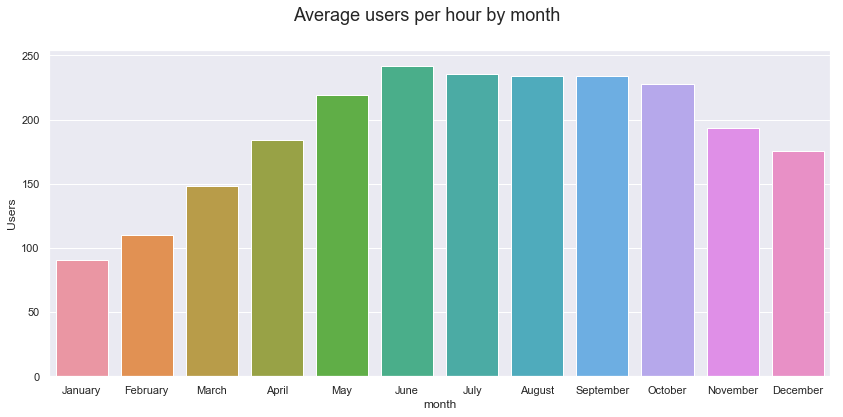

In [72]:
fig,ax2 = plt.subplots(1,1)
fig.suptitle('Average users per hour by month',fontsize = 18)
sns.set(style = 'darkgrid')
fig.set_size_inches(14,6)
ax2 = sns.barplot(data = monthAvgPerhour , x = 'month',y = 'count')
ax2.set(ylabel = 'Users')

[Text(0,0.5,'Users')]

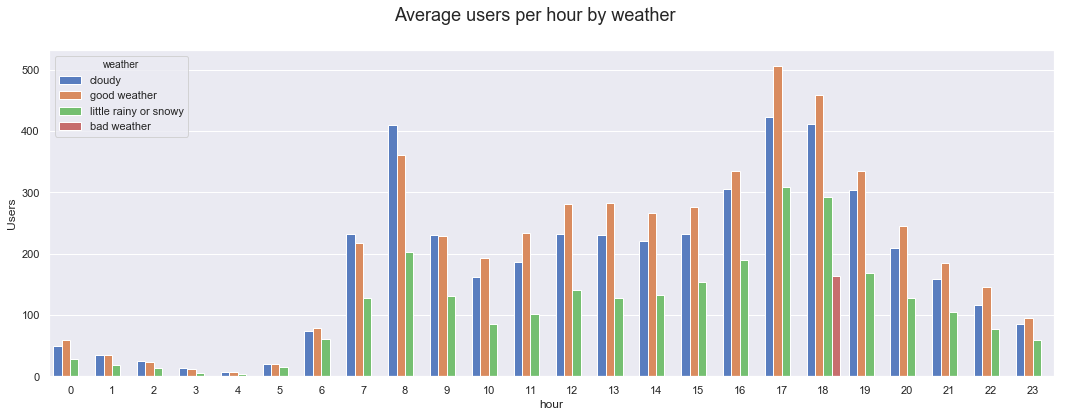

In [101]:
#不同的天气情况下，各小时段的平均使用人次
weatherAvg = pd.DataFrame(bikedf['count'].groupby([bikedf['hour'],bikedf['weather']],sort = True).mean()).reset_index()
fig,ax3 =plt.subplots(1,1)
fig.suptitle('Average users per hour by weather' , fontsize = 18)
fig.set_size_inches(18,6)

ax3 = sns.barplot(data = weatherAvg ,x = 'hour',y = 'count',hue = 'weather',palette = 'muted')
ax3.set(ylabel = 'Users')

In [90]:
import warnings
warnings.filterwarnings("ignore")
#一天中各小时段的用户人群（average）
hourTransformed = pd.melt(bikedf,id_vars = ['hour'],value_vars = ['casual','registered'])
hourTransformedAgg = pd.DataFrame(hourTransformed['value'].groupby([hourTransformed['hour'],hourTransformed['variable']],sort = True
                                                                  ).mean()).reset_index()
hourTransformedAgg.head()

,hour,variable,value
0,0,casual,10.312088
1,0,registered,44.826374
2,1,casual,6.513216
3,1,registered,27.345815
4,2,casual,4.819196


[Text(0,0.5,'Users')]

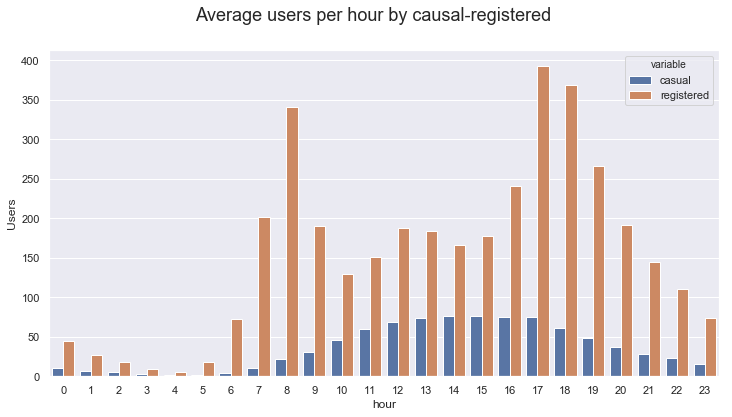

In [100]:
fig,ax4 = plt.subplots(1,1)
fig.suptitle('Average users per hour by causal-registered',fontsize = 18)
fig.set_size_inches(12,6)
ax4 = sns.barplot(data = hourTransformedAgg,x = 'hour',y = 'value',hue = 'variable')
ax4.set(ylabel = 'Users')

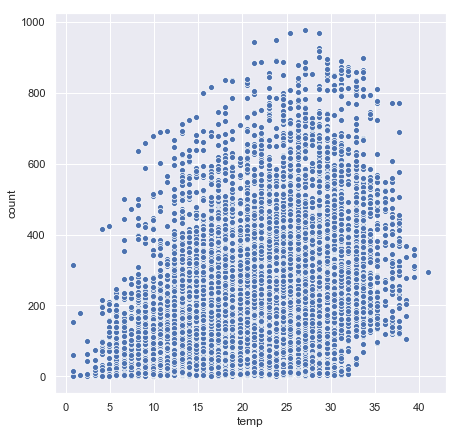

In [102]:
fig,ax = plt.subplots(figsize = (7,7))
sns.scatterplot(data = bikedf, x = 'temp',y = 'count')